In [131]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [132]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [133]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [134]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


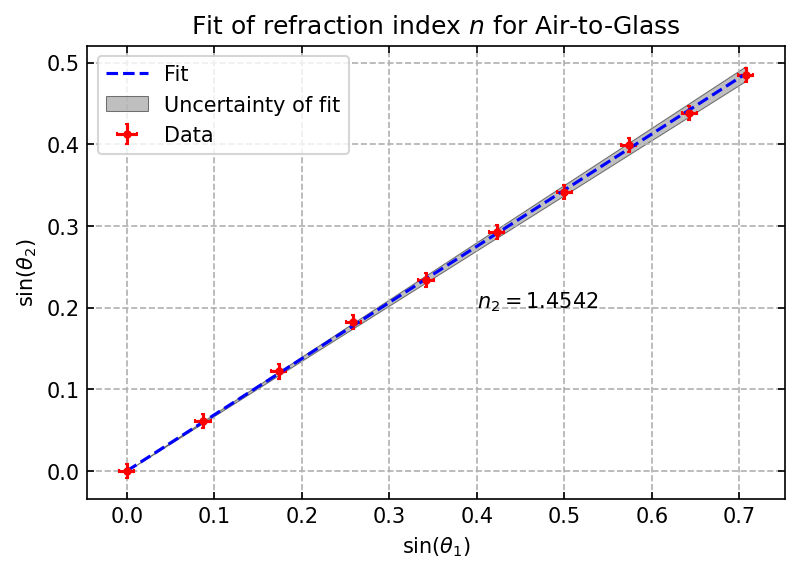

In [135]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


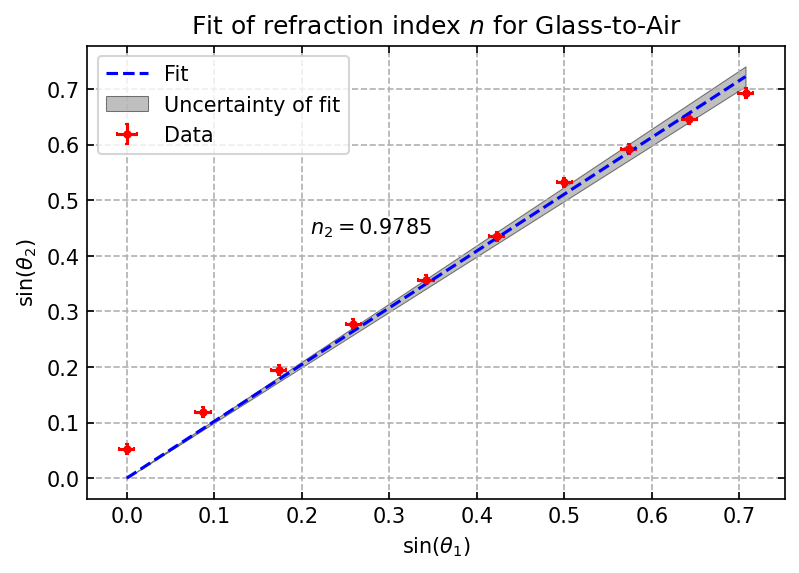

In [136]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [137]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser
E_0_S = 5-0.01 #1.8 on the day
E_0_P = 1.25-0.01

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 5]-0.01
E_2_S = S_pol_L3[:, 2]-0.01

E_1_P = P_pol_L3[:, 5]-0.01
E_2_P = P_pol_L3[:, 2]-0.01

In [138]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([-0.00806452, -0.00806452,  0.        ,  0.0016129 , -0.0016129 ,
        -0.00403226, -0.00403226, -0.00725806, -0.00806452, -0.01612903,
        -0.02419355, -0.03225806, -0.02741935, -0.02016129,  0.        ,
         0.02822581,  0.08064516,  0.17741935]),
 array([-0.00200401, -0.00200401,  0.02204409,  0.03607214,  0.02905812,
         0.02805611,  0.04408818,  0.03206413,  0.05210421,  0.05410822,
         0.09218437,  0.10821643,  0.15230461,  0.21843687,  0.25851703,
         0.3987976 ,  0.57915832,  0.71943888]))

In [139]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([ 0.33870968,  0.35483871,  0.37903226,  0.36290323,  0.34677419,
         0.31451613,  0.31451613,  0.30645161,  0.28225806,  0.26612903,
         0.23387097,  0.22580645,  0.17741935,  0.14516129,  0.10483871,
         0.07258065,  0.02822581, -0.00806452]),
 array([0.75951904, 0.81963928, 0.83967936, 0.7995992 , 0.75951904,
        0.71943888, 0.65931864, 0.65931864, 0.61923848, 0.57915832,
        0.47895792, 0.47895792, 0.35871743, 0.27855711, 0.21242485,
        0.14228457, 0.05911824, 0.00601202]))

In [140]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([6.50364204e-05, 6.50364204e-05, 0.00000000e+00, 2.60145682e-06,
        2.60145682e-06, 1.62591051e-05, 1.62591051e-05, 5.26795005e-05,
        6.50364204e-05, 2.60145682e-04, 5.85327784e-04, 1.04058273e-03,
        7.51821020e-04, 4.06477627e-04, 0.00000000e+00, 7.96696150e-04,
        6.50364204e-03, 3.14776275e-02]),
 array([4.01604813e-06, 4.01604813e-06, 4.85941824e-04, 1.30119959e-03,
        8.44374119e-04, 7.87145433e-04, 1.94376729e-03, 1.02810832e-03,
        2.71484853e-03, 2.92769909e-03, 8.49795784e-03, 1.17107963e-02,
        2.31966940e-02, 4.77146678e-02, 6.68310569e-02, 1.59039522e-01,
        3.35424356e-01, 5.17592299e-01]))

In [141]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

# Uncertainties
Volt_err = S_pol_L3[:, 3] + 0.1

In [142]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([8.57356808e-01, 1.00040250e+00, 1.05611322e+00, 9.67278015e-01,
       8.85278471e-01, 8.11694648e-01, 7.01019602e-01, 7.25999865e-01,
       6.71482072e-01, 6.16613634e-01, 4.54649881e-01, 4.95671868e-01,
       3.11390438e-01, 2.16486678e-01, 1.52386264e-01, 8.90548578e-02,
       2.29145298e-02, 4.85692980e-04])

In [143]:
#Check if R+T holds:
total_s = R_s + T_s

total_p = R_p + T_p
total_p, total_s

(array([0.17057096, 0.1875607 , 0.21519683, 0.19924799, 0.18454498,
        0.15514445, 0.15953999, 0.15689731, 0.13957694, 0.13045776,
        0.10898675, 0.11121284, 0.07692504, 0.05919659, 0.03711748,
        0.02396977, 0.01172713, 0.03235156]),
 array([0.85736082, 1.00040651, 1.05659916, 0.96857921, 0.88612285,
        0.81248179, 0.70296337, 0.72702797, 0.67419692, 0.61954133,
        0.46314784, 0.50738266, 0.33458713, 0.26420135, 0.21921732,
        0.24809438, 0.35833889, 0.51807799]))

In [144]:
#Difference from 1
D_s = 1 - R_s - T_s
D_s


array([ 1.42639176e-01, -4.06514837e-04, -5.65991589e-02,  3.14207853e-02,
        1.13877154e-01,  1.87518207e-01,  2.97036631e-01,  2.72972026e-01,
        3.25803080e-01,  3.80458667e-01,  5.36852162e-01,  4.92617335e-01,
        6.65412868e-01,  7.35798654e-01,  7.80782679e-01,  7.51905620e-01,
        6.41661115e-01,  4.81922008e-01])

In [145]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

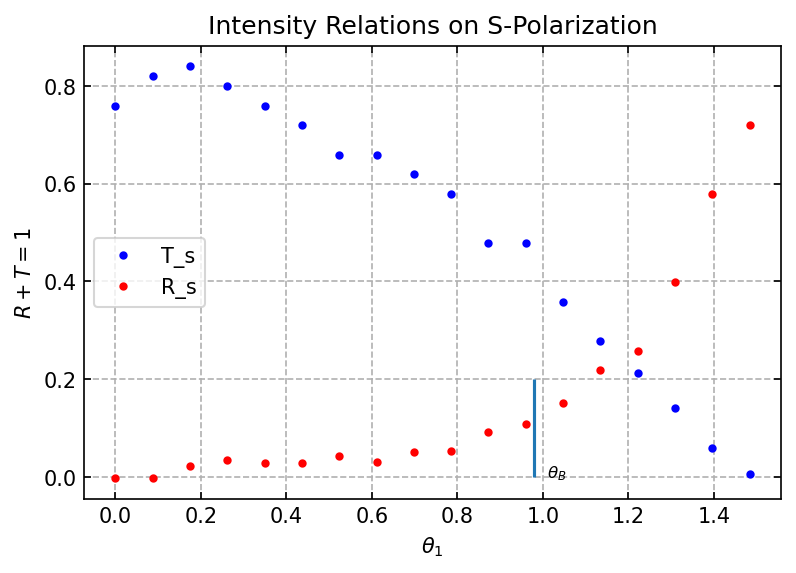

In [146]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
# ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

Text(1.01, 0.0, '$\\theta_{B}$')

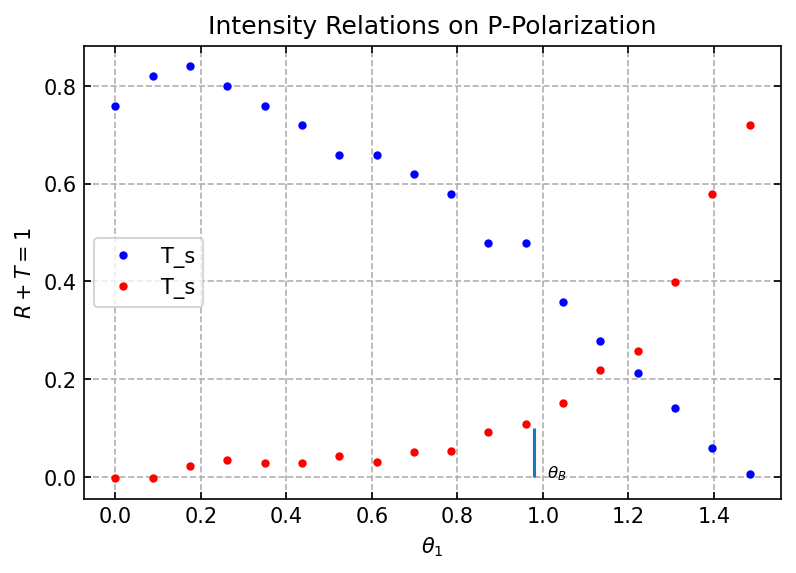

In [147]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)

INTENSITY PLOTS AIR TO GLASS

In [148]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_14712/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_14712/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


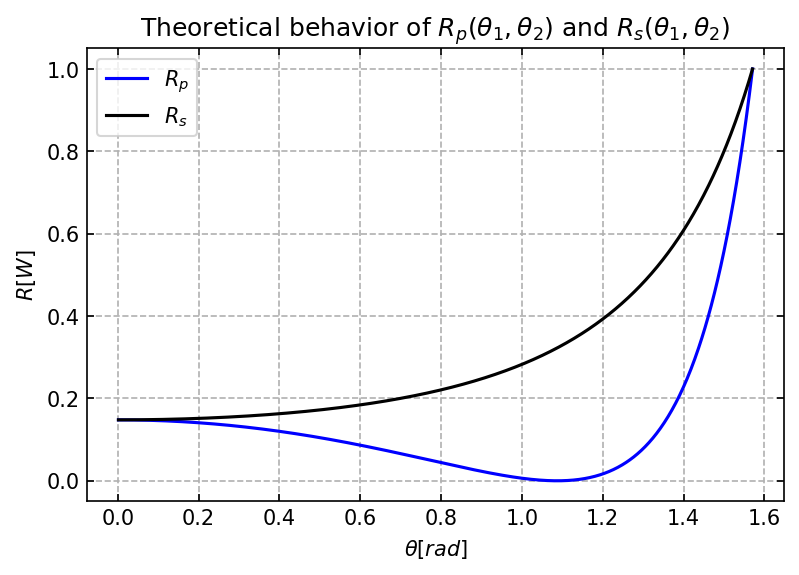

In [149]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
#plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
#plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


#brewster = np.arctan(np.sqrt(p_opt_atg))
#plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_14712/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_14712/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


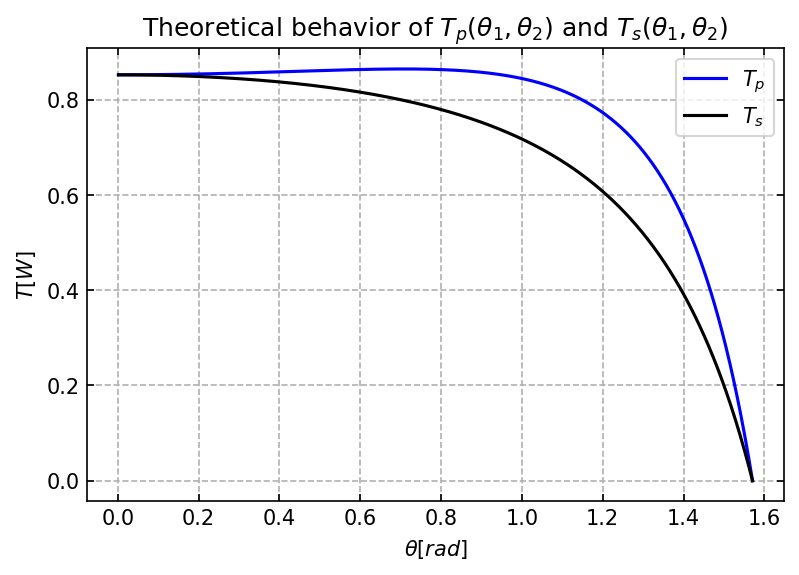

In [150]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'Blue', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'Black', label = r'$T_s$')
#plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
#plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

## FINAL PLOTS

/tmp/ipykernel_14712/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_14712/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


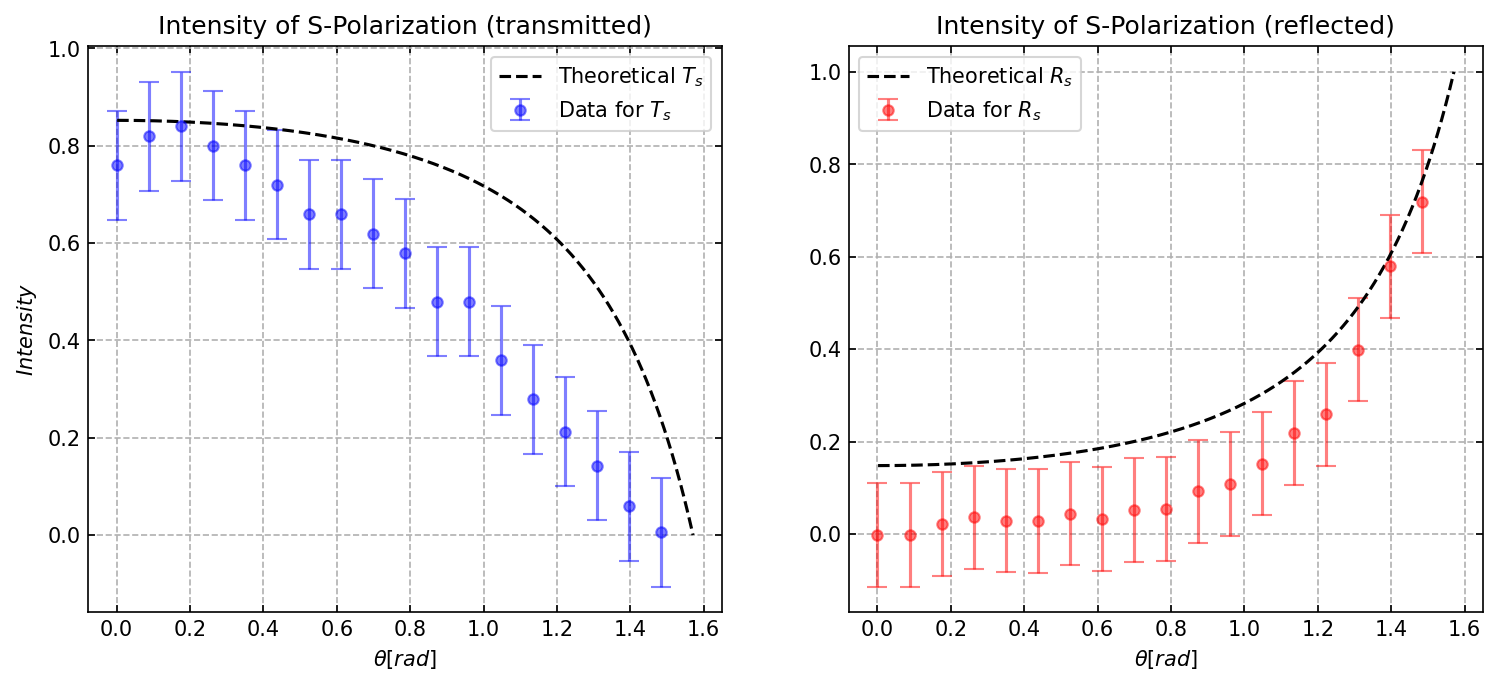

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_s, t_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
#ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_s, r_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $R_s$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

/tmp/ipykernel_14712/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_14712/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


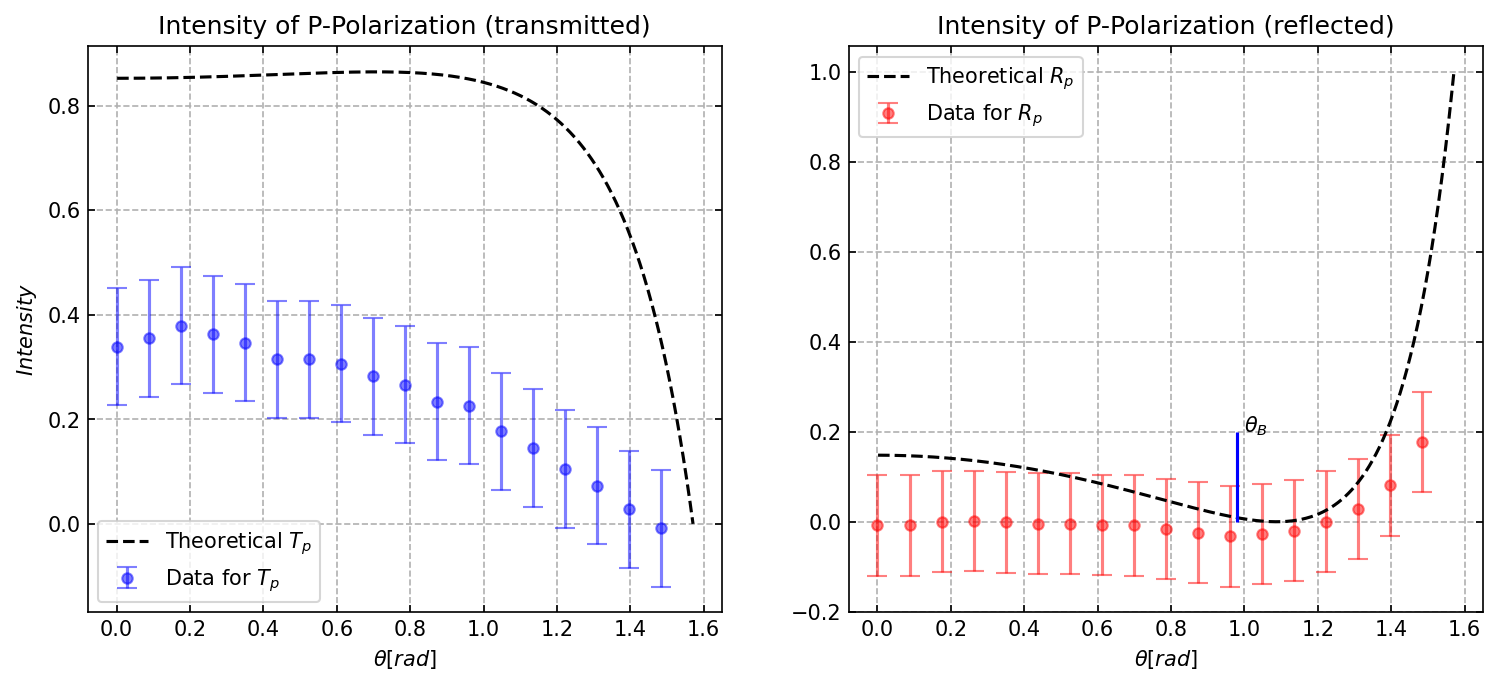

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_p, t_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_p$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $T_p$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of P-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_p, r_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_p$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $R_p$')
ax2.vlines(x = Brewster, ymin=0, ymax=0.2, linestyle = '-', color = 'blue')
ax2.text(1.0, 0.2, r'$\theta_B$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of P-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

In [153]:
#Weighted mean

w1 =1/0.001**2
w2 = 1/0.007**2
w3 = 1/0.013**2

w4 = 1/0.0028**2
w5 = 1/0.0061**2

x_atg=[1.4403,1.5269,1.4542]
x_gta =[0.9585,0.9785]

X_ATG = (w1*x_atg[0]+w2*x_atg[1]+w3*x_atg[2])/(w1+w2+w3)
X_GTA = (w4*x_gta[0]+w5*x_gta[1])/(w4+w5)

X_ATG, X_GTA

(1.4421021531944935, 0.9619805771365151)

In [154]:
#Standard error on the weighted mean is:
sigma_atg = np.sqrt((w1**2*0.001**2+w2**2*0.007**2+w3**2+0.013**2)/(w1**2+w2**2+w3**2))
sigma_atg

0.006001410332010635

In [155]:
sigma_gta =np.sqrt((w4**2*0.0028**2+w5**2*0.0061**2)/(w4**2+w5**2))
sigma_gta

0.003014696898610339